In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy

PART ONE: VERIFYING ACCURACY OF BATTERY LEVEL (VBAT)

Methodological Summary: The 'VBAT' values above were collected by reading DC power supply voltages in the AIN4 channel and observing the read voltages via log statements.

In [14]:
#retrieve voltage and blink frequency data from .csv

vbat_1_5_dataset = pd.read_csv(r'C:\f23-ble\data\vbat_gain_1_5.csv')
print("VBAT 'Battery' Simulation: AIN4 DC Power Supply Voltage vs. Read 'VBAT' Voltage \n")

print("NOTE: Data was collected with this gain in the overlay: 'ADC_GAIN_1_5.'")

vbat_1_5_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

VBAT 'Battery' Simulation: AIN4 DC Power Supply Voltage vs. Read 'VBAT' Voltage 

NOTE: Data was collected with this gain in the overlay: 'ADC_GAIN_1_5.'


Power Supply Voltage (mV)  VBAT #1 (mV)  VBAT #2 (mV)  VBAT #3 (mV)
0                          0             0           -15             0
1                        600           600           600           600
2                       1200          1201          1201          1201
3                       1800          1816          1801          1801
4                       2400          2416          2402          2402
5                       3000          3017          3017          3017
6                       3600          2021          2021          2021

For the 3600mV DC power supply, the ADC_GAIN_1_5 incorrectly read voltages of 2021mV (ie. 3600mV was out of range). To troubleshoot this, the gain was changed to ADC_GAIN_1_6, and new VBAT values were collected for the 3600mV power supply voltage. This data is shown below. 

In [15]:
vbat_1_6_dataset = pd.read_csv(r'C:\f23-ble\data\vbat_gain_1_6.csv')
print("Addendum to VBAT 'Battery' Simulation: AIN4 DC Power Supply Voltage vs. Read 'VBAT' Voltage \n")

print("NOTE: Data was collected with this gain in the overlay: 'ADC_GAIN_1_6.'")


vbat_1_6_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

Addendum to VBAT 'Battery' Simulation: AIN4 DC Power Supply Voltage vs. Read 'VBAT' Voltage 

NOTE: Data was collected with this gain in the overlay: 'ADC_GAIN_1_6.'


Power Supply Voltage (mV)  VBAT #1 (mV)  VBAT #2 (mV)  VBAT #3 (mV)
0                       3600          2039          2039          2039

NOTE: Error is so small that error bars are not clearly visible on plot.


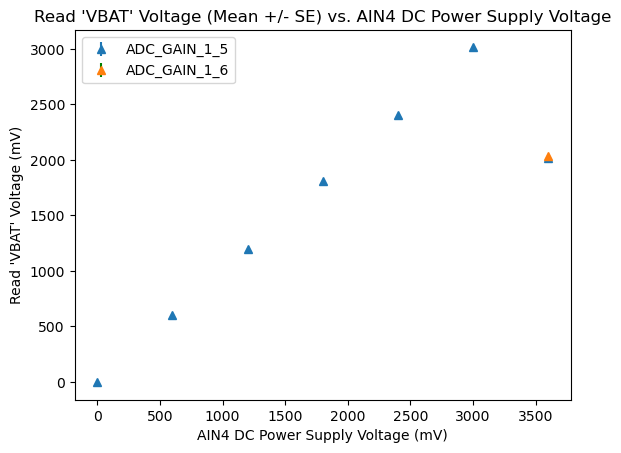

In [16]:
print("NOTE: Error is so small that error bars are not clearly visible on plot.")

#extract and analyze vbat data for ADC_GAIN_1_5
ain4_ps_mV = np.array(vbat_1_5_dataset["Power Supply Voltage (mV)"])
vbat_mV = [np.array(vbat_1_5_dataset["VBAT #1 (mV)"]), np.array(vbat_1_5_dataset["VBAT #2 (mV)"]), np.array(vbat_1_5_dataset["VBAT #3 (mV)"])]
vbat_mean_mV = np.mean(vbat_mV, axis = 0)
vbat_sterr_mV = (np.std(vbat_mV, axis = 0))/(np.sqrt(len(vbat_mV)))

#extract and analyze addendum vbat data for ADC_GAIN_1_6
ain4_ps_mV_addendum = np.array(vbat_1_6_dataset["Power Supply Voltage (mV)"])
vbat_mV_addendum = [np.array(vbat_1_6_dataset["VBAT #1 (mV)"]), np.array(vbat_1_6_dataset["VBAT #2 (mV)"]), np.array(vbat_1_6_dataset["VBAT #3 (mV)"])]
vbat_mean_mV_addendum = np.mean(vbat_mV_addendum, axis = 0)
vbat_sterr_mV_addendum = (np.std(vbat_mV_addendum, axis = 0))/(np.sqrt(len(vbat_mV_addendum)))

#graph mean and standard error 
plt.errorbar(ain4_ps_mV, vbat_mean_mV, vbat_sterr_mV, linestyle='None', marker='^', label="ADC_GAIN_1_5")
plt.errorbar(ain4_ps_mV_addendum, vbat_mean_mV_addendum, vbat_sterr_mV_addendum, ecolor = "green", linestyle='None', marker='^', label="ADC_GAIN_1_6")
plt.ylabel("Read 'VBAT' Voltage (mV)")
plt.xlabel("AIN4 DC Power Supply Voltage (mV)")
plt.title("Read 'VBAT' Voltage (Mean +/- SE) vs. AIN4 DC Power Supply Voltage")
plt.legend()

VBAT Conclusion:

'Battery' values (simulated with a DC power supply into AIN4) can be internally read with reasonable accuracy and precision from 0 to 3000mV. 3600mV could not be accurately read for either of the two gains tested (ADC_GAIN_1_5 and ADC_GAIN_1_6). This observation for ADC_GAIN_1_6 goes against the expected behavior described in zephyr documentation (https://edstem.org/us/courses/44023/discussion/3884169), and it calls into question whether a 3600mV voltage can be accurately read on the nrf52833dk dev kit.

PART TWO: VERIFYING BLUETOOTH BATTERY LEVEL GATT

VBAT 'Battery' Level UUID



Screenshot of VBAT 'Battery' Level Received via Bluetooth (unsure about the accuracy of the value)

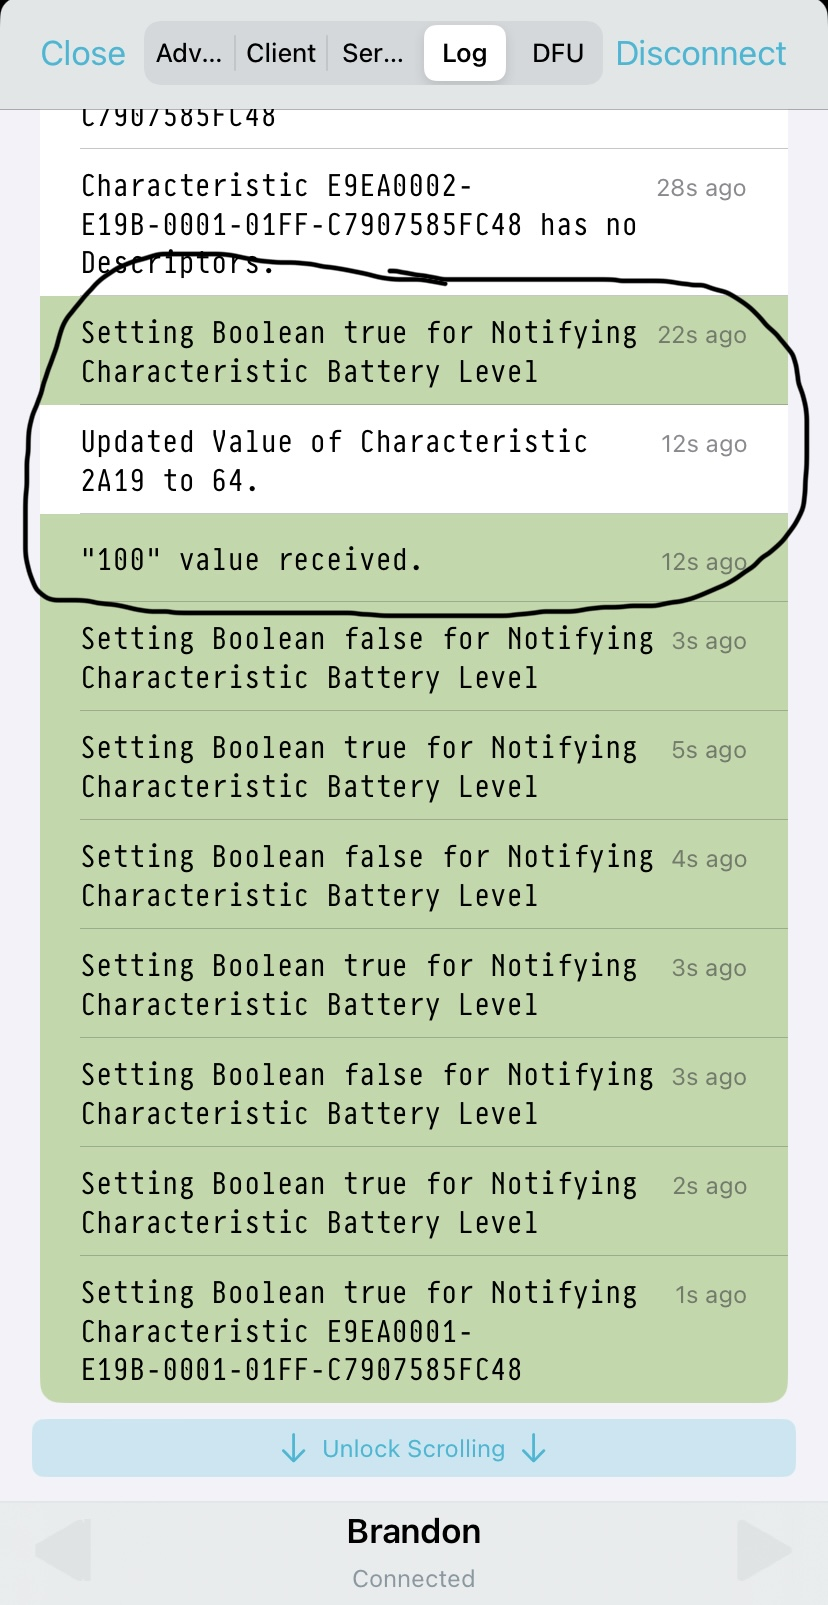

PARTS 3 & 4: MEASUREMENT AND ANALYSIS OF VPP AND LED BRIGHTNESS FOR LEDS 1 AND 2

Oscope Image for LED1 PWM, Vpp = 50mV

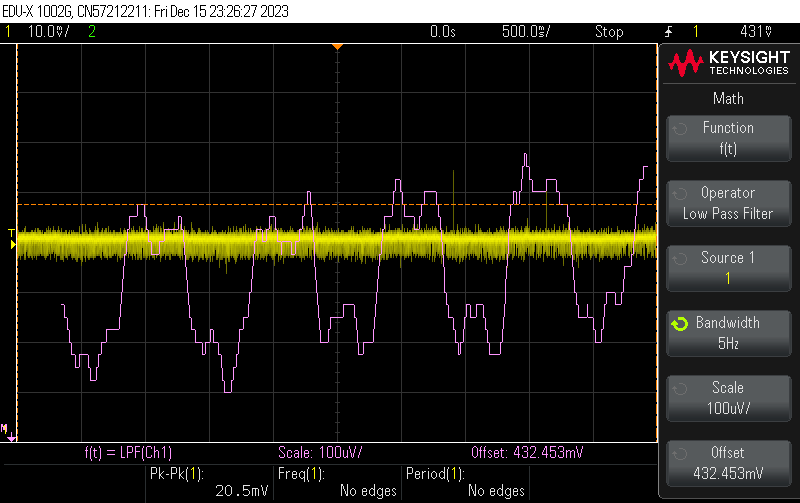

Oscope Image for LED1 PWM at Vpp = 5mV




Oscope Image for LED2_PWM at 10mV Vpp (500Hz Sine Wave)



Oscope Image for LED2_PWM at Vpp of 122mV (500Hz Sine Wave)

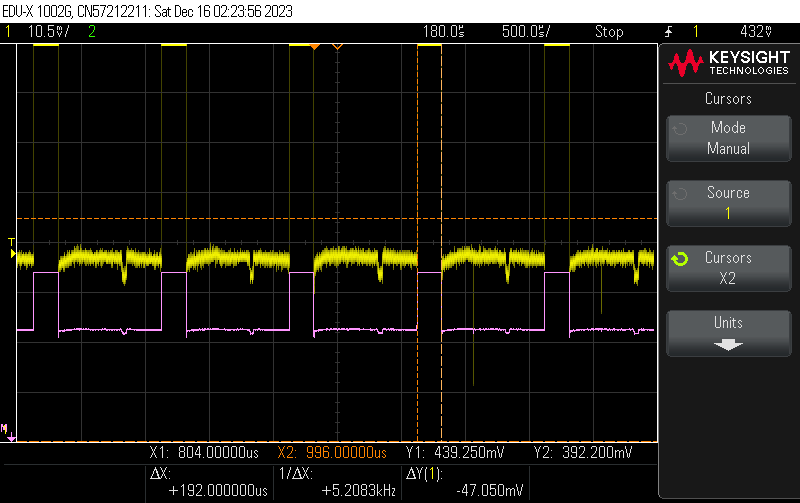

In [17]:
#retrieve high duration vs. vpp for LED1 
led1_high_dataset = pd.read_csv(r'C:\f23-ble\data\LED1_PWM_HIGH_DURATION.csv')
print("LED1: Duration of High within Period vs. Vpp \n")

led1_high_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

LED1: Duration of High within Period vs. Vpp 



Vpp (mV)  Duration of High #1 (us)  Duration of High #2 (us)  \
0       5.0                       770                       740   
1      12.5                       620                       640   
2      20.0                       510                       490   
3      27.5                       360                       330   
4      35.0                       200                       200   

   Duration of High #3 (us)  
0                       750  
1                       640  
2                       490  
3                       340  
4                       200

In [30]:
#retrieve high duration vs. vpp for LED2 
led2_high_dataset = pd.read_csv(r'C:\f23-ble\data\LED2_PWM_HIGH_DURATION.csv')
print("LED2: Duration of High within Period vs. Vpp \n")

led2_high_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

LED2: Duration of High within Period vs. Vpp 



Vpp (mV)  Duration of High #1 (us)  Duration of High #2 (us)  \
0        10                       976                       974   
1        38                       790                       810   
2        66                       590                       590   
3        94                       390                       390   
4       122                       192                       196   

   Duration of High #3 (us)  
0                       978  
1                       790  
2                       590  
3                       390  
4                       192

Methodological Summary: These durations were estimated by connecting the LED to the oscilloscope and applying a low pass filter via the oscilloscope's built-in settings. On the oscilloscope, cursors were used to estimate the duration of the "high" part of the waveform for a given period in microseconds. Bandwidths, scales, and offsets were varied throughout data collection to elicit a coherent waveform from the filter. Since these parameters were not held constant between each set of data points for each Vpp, they could be confounding variables. 

In [25]:
#retrieve high duration vs. vpp for LED1 
led1_bright_dataset = pd.read_csv(r'C:\f23-ble\data\LED1_PWM_BRIGHTPERCENT.csv')
print("LED1: Percentage Brightness vs. Vpp for a 100Hz Sinusoidal Signal\n")
print("Note: Brightness percentages are as decimals (ie. 1.00 = 100%)")

led1_bright_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

LED1: Percentage Brightness vs. Vpp for a 100Hz Sinusoidal Signal

Note: Brightness percentages are as decimals (ie. 1.00 = 100%)


Vpp (mV)  BRIGHT_LED1 #1  BRIGHT_LED1 #2  BRIGHT_LED1 #3
0       5.0            0.23            0.26            0.25
1      12.5            0.38            0.36            0.36
2      20.0            0.49            0.51            0.51
3      27.5            0.64            0.67            0.66
4      35.0            0.80            0.80            0.80

In [32]:
#retrieve high duration vs. vpp for LED2 
led2_bright_dataset = pd.read_csv(r'C:\f23-ble\data\LED2_PWM_BRIGHTPERCENT.csv')
print("LED2: Percentage Brightness vs. Vpp for a 500Hz Sinusoidal Signal\n")
print("Note: Brightness percentages are as decimals (ie. 1.00 = 100%)")

led2_bright_dataset.head(None)


#source:
#https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe

LED2: Percentage Brightness vs. Vpp for a 500Hz Sinusoidal Signal

Note: Brightness percentages are as decimals (ie. 1.00 = 100%)


Vpp (mV)  BRIGHT_LED2 #1  BRIGHT_LED2 #2  BRIGHT_LED2 #3
0        10           0.024           0.026           0.022
1        38           0.210           0.190           0.210
2        66           0.410           0.410           0.410
3        94           0.610           0.610           0.610
4       122           0.808           0.804           0.808

Methodological Summary: 

    Brightness percentages were backcalculated from "high" durations using the following equation:

    Bright_percentage = 1 - (High_Duration_US / 1000US)

In [29]:
#extract and analyze brightness data for LED1
vpp_100Hz_mV = np.array(led1_bright_dataset["Vpp (mV)"])
bright_led1 = [np.array(led1_bright_dataset["BRIGHT_LED1 #1"]), np.array(led1_bright_dataset["BRIGHT_LED1 #2"]), np.array(led1_bright_dataset["BRIGHT_LED1 #3"])]
bright_led1_mean = np.mean(bright_led1, axis = 0)
bright_led1_sterr = (np.std(bright_led1, axis = 0))/(np.sqrt(len(bright_led1)))

#graph mean and standard error 
plt.errorbar(vpp_100Hz_mV, bright_led1_mean, bright_led1_sterr, linestyle='None', marker='^')
plt.ylabel("Brightness Percentage (as decimal)")
plt.xlabel("Vpp (mV)")
plt.title("LED1 Brightness from Oscilloscope vs. Vpp from 100Hz Sine Wave")
plt.legend()

arr1_brightled1 = np.array(led1_bright_dataset["BRIGHT_LED1 #1"])
arr2_brightled1 = np.array(led1_bright_dataset["BRIGHT_LED1 #2"])
arr3_brightled1 = np.array(led1_bright_dataset["BRIGHT_LED1 #3"])

brightled1_1DArray = [*arr1_brightled1, *arr2_brightled1, *arr3_brightled1]
vpp_100Hz_1DArray = [*vpp_100Hz_mV, *vpp_100Hz_mV, *vpp_100Hz_mV]

#graph line of best fit 
plt.plot(vpp_100Hz_mV, np.poly1d(np.polyfit(vpp_100Hz_1DArray, brightled1_1DArray, 1))(vpp_100Hz_mV), c = "green", linestyle = 'dashed', label="Line of Best Fit")

#calculate R^2
slope1, intercept1, bright1_r_value, p_value1, std_err1 = scipy.stats.linregress(vpp_100Hz_1DArray, brightled1_1DArray)
bright1_r_squared = bright1_r_value**2
plt.legend()

print("\nThe R^2 value is", bright1_r_squared)

# Sources:
# https://stackoverflow.com/questions/55912292/average-point-and-standard-deviation-bars-on-scatter-plot#:~:text=If%20you%20want%20to%20plot%20a%20single%20scatter,actual%20standard%20deviation%20values%20in%20xerr%20and%20yerr.
# https://stackoverflow.com/questions/22481854/plot-mean-and-standard-deviation
# https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
# https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot
# https://www.geeksforgeeks.org/how-to-plot-a-dashed-line-in-matplotlib/
# https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# https://www.freecodecamp.org/news/how-to-square-a-number-in-python-squaring-function/


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



The R^2 value is 0.9956275661819749


Conclusion: Across the measured range of 5-35mV, the relationship between LED1 brightness as measured by the oscilloscope and Vpp from the 100Hz wave is quite linear as the R^2 value is greater than 0.995. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



The R^2 value is 0.9993188459029331


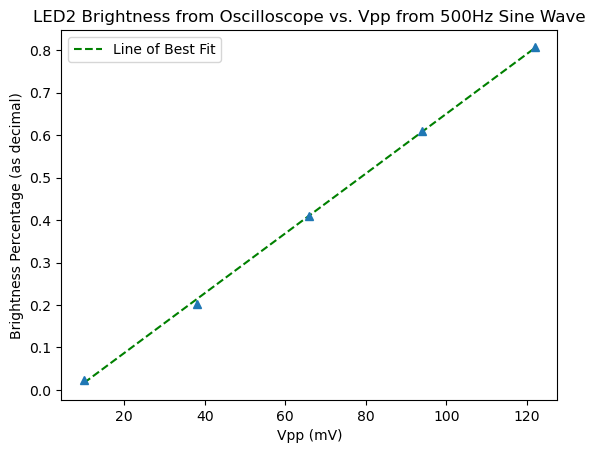

In [33]:
#extract and analyze brightness data for LED1
vpp_500Hz_mV = np.array(led2_bright_dataset["Vpp (mV)"])
bright_led2 = [np.array(led2_bright_dataset["BRIGHT_LED2 #1"]), np.array(led2_bright_dataset["BRIGHT_LED2 #2"]), np.array(led2_bright_dataset["BRIGHT_LED2 #3"])]
bright_led2_mean = np.mean(bright_led2, axis = 0)
bright_led2_sterr = (np.std(bright_led2, axis = 0))/(np.sqrt(len(bright_led2)))

#graph mean and standard error 
plt.errorbar(vpp_500Hz_mV, bright_led2_mean, bright_led2_sterr, linestyle='None', marker='^')
plt.ylabel("Brightness Percentage (as decimal)")
plt.xlabel("Vpp (mV)")
plt.title("LED2 Brightness from Oscilloscope vs. Vpp from 500Hz Sine Wave")
plt.legend()

arr1_brightled2 = np.array(led2_bright_dataset["BRIGHT_LED2 #1"])
arr2_brightled2 = np.array(led2_bright_dataset["BRIGHT_LED2 #2"])
arr3_brightled2 = np.array(led2_bright_dataset["BRIGHT_LED2 #3"])

brightled2_1DArray = [*arr1_brightled2, *arr2_brightled2, *arr3_brightled2]
vpp_500Hz_1DArray = [*vpp_500Hz_mV, *vpp_500Hz_mV, *vpp_500Hz_mV]

#graph line of best fit 
plt.plot(vpp_500Hz_mV, np.poly1d(np.polyfit(vpp_500Hz_1DArray, brightled2_1DArray, 1))(vpp_500Hz_mV), c = "green", linestyle = 'dashed', label="Line of Best Fit")

#calculate R^2
slope2, intercept2, bright2_r_value, p_value2, std_err2 = scipy.stats.linregress(vpp_500Hz_1DArray, brightled2_1DArray)
bright2_r_squared = bright2_r_value**2
plt.legend()

print("\nThe R^2 value is", bright2_r_squared)

# Sources:
# https://stackoverflow.com/questions/55912292/average-point-and-standard-deviation-bars-on-scatter-plot#:~:text=If%20you%20want%20to%20plot%20a%20single%20scatter,actual%20standard%20deviation%20values%20in%20xerr%20and%20yerr.
# https://stackoverflow.com/questions/22481854/plot-mean-and-standard-deviation
# https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
# https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot
# https://www.geeksforgeeks.org/how-to-plot-a-dashed-line-in-matplotlib/
# https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# https://www.freecodecamp.org/news/how-to-square-a-number-in-python-squaring-function/

Conclusion: Across the measured range of 10-122mV, the relationship between LED2 brightness as measured by the oscilloscope and Vpp from the 500Hz wave is quite linear as the R^2 value is greater than 0.999. 

PART 5: Receiving Button 1 Data Array via Bluetooth



UUID for Button 1 Data Array

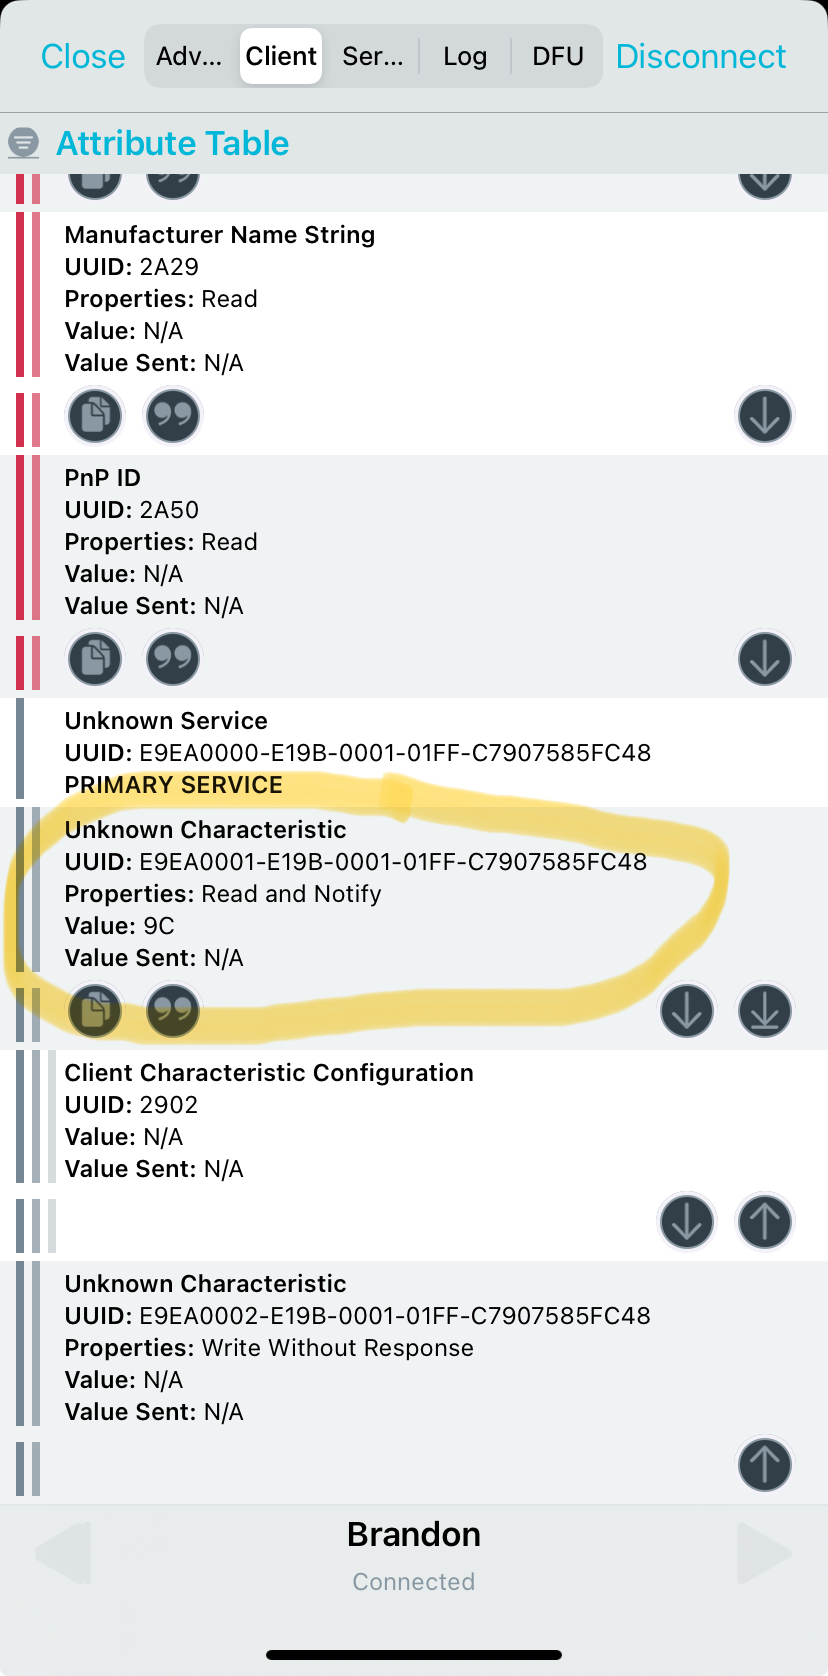

Screenshot of Received Value from Button 1 Data Array

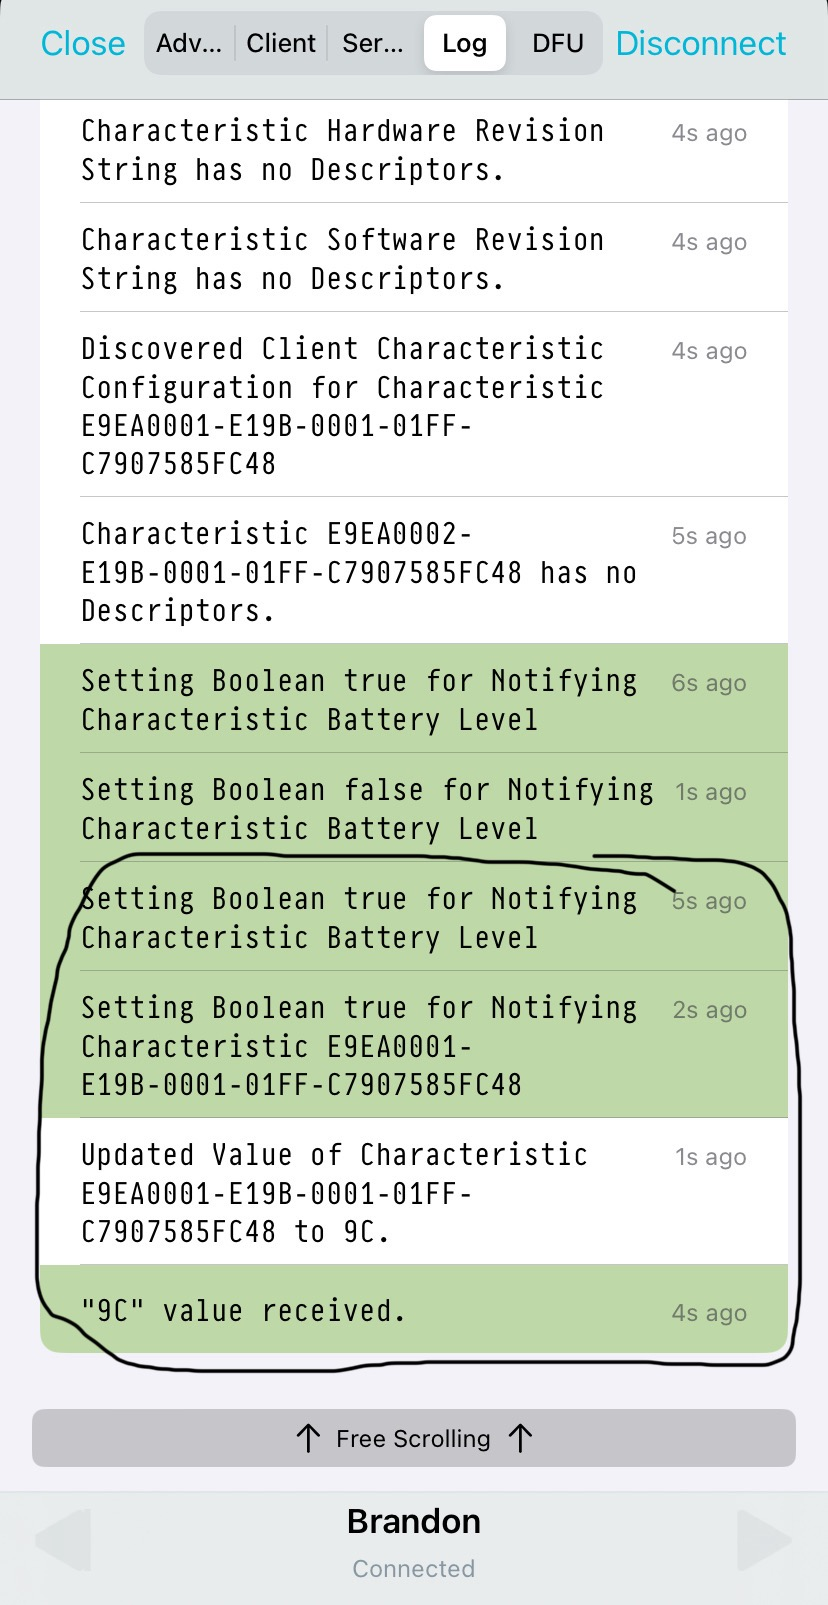

PART 6: SAFETY FEATURE (VBUS) DEMONSTRATION

https://drive.google.com/file/d/1sk3xjPShHOVTtb0SF2KaB7L0Ow9Fz9VY/view?usp=sharing

PART 7: Theoretical Question 


Equation:

max_frequency = (0.5 cycles/sec)*(max_samples/sec)

Source

 https://en.wikipedia.org/wiki/Sampling_(signal_processing)#:~:text=The%20corresponding%20frequency%20limit%2C%20in%20cycles%20per%20second,known%20as%20the%20Nyquist%20frequency%20of%20the%20sampler.

Calculation:

max_frequency = (0.5 cycles/samples)*(200000 samples/sec) = 100000 cycles/sec = 100000Hz = 100kHz

Source of max_samples/sec value

https://edstem.org/us/courses/44023/discussion/4066109

According to this calculation, the max input frequency that the device could support is theoretically 100kHz. 
